# I. Visualisation

**0. Installing Dependencies**

In [2]:
#Dependencies
%pip install openpyxl matplotlib pandas darts statsmodels -q


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
file_paths = [
    '../../Data/EnergieUebersichtCH-2022.xlsx',
    '../../Data/EnergieUebersichtCH-2023.xlsx',
    '../../Data/EnergieUebersichtCH-2024.xlsx',
    '../../Data/EnergieUebersichtCH-2025.xlsx'
]
sheet_name = 'Zeitreihen0h15'
total = 29000

**1. Retrieving Data**

In [4]:
import pandas as pd
# Read and concatenate all data
dfs = []
for path in file_paths:
    xls = pd.ExcelFile(path)
    df_year = pd.read_excel(xls, sheet_name=sheet_name, header=1)
    dfs.append(df_year)


Combining all years into a single DataFrame

In [5]:
df = pd.concat(dfs, ignore_index=True)
print(df.columns)

Index(['Zeitstempel', 'kWh', 'kWh.1', 'kWh.2', 'kWh.3', 'kWh.4', 'kWh.5',
       'kWh.6', 'kWh.7', 'kWh.8', 'kWh.9', 'kWh.10', 'kWh.11', 'kWh.12',
       'kWh.13', 'kWh.14', 'kWh.15', 'kWh.16', 'kWh.17', 'kWh.18', 'kWh.19',
       'Euro/MWh', 'Euro/MWh.1', 'Euro/MWh.2', 'Euro/MWh.3', 'kWh.20',
       'kWh.21', 'kWh.22', 'kWh.23', 'kWh.24', 'kWh.25', 'kWh.26', 'kWh.27',
       'kWh.28', 'kWh.29', 'kWh.30', 'kWh.31', 'kWh.32', 'kWh.33', 'kWh.34',
       'kWh.35', 'kWh.36', 'kWh.37', 'kWh.38', 'kWh.39', 'kWh.40', 'kWh.41',
       'kWh.42', 'kWh.43', 'kWh.44', 'kWh.45', 'kWh.46', 'kWh.47', 'kWh.48',
       'kWh.49', 'kWh.50', 'kWh.51', 'kWh.52', 'kWh.53', 'kWh.54', 'kWh.55',
       'kWh.56', 'kWh.57', 'kWh.58', 'kWh.59'],
      dtype='object')


1.1 Aggregate Data by day

In [6]:
df['Zeitstempel'] = pd.to_datetime(
    df['Zeitstempel'],
    format='%d.%m.%Y %H:%M',   
    dayfirst=True,            
    errors='raise'            
)


In [7]:
df = df.set_index('Zeitstempel')
df = df.resample('24H').sum()

Recalculate total by 24h

In [8]:
total = int ((total / 96) -1) 
print(total)

301


In [9]:
time_index = df.index

**2. Data variables / potential parameters** 

**Pre-processing step** Renaming column names to be clear

In [10]:
column_mapping = { 
    'kWh': 'Total Energy Consumed by End Users (kWh)',
    'kWh.1': 'Total Energy Production (kWh)',
    'kWh.2': 'Total Energy Consumption (kWh)',
    'kWh.3': 'Net Outflow (kWh)',
    'kWh.4': 'Grid Feed-In (kWh)',
    'kWh.5': 'Positive Secondary Control Energy (kWh)',
    'kWh.6': 'Negative Secondary Control Energy (kWh)',
    'kWh.7': 'Positive Tertiary Control Energy (kWh)',
    'kWh.8': 'Negative Tertiary Control Energy (kWh)'
}

df.rename(columns=column_mapping, inplace=True)

The goal is to predict the next element of the Total Energy Consumption columb:

In [11]:
energy_consumption_data = df['Total Energy Consumption (kWh)'].dropna().values

In [12]:
import matplotlib.pyplot as plt

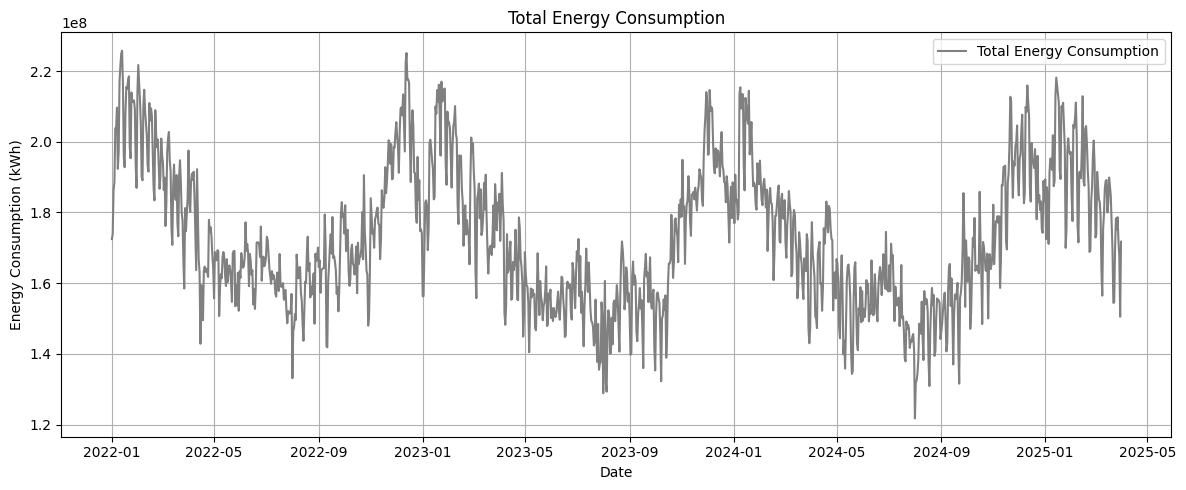

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df['Total Energy Consumption (kWh)'], label='Total Energy Consumption', color='gray')
ax.set_title('Total Energy Consumption')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

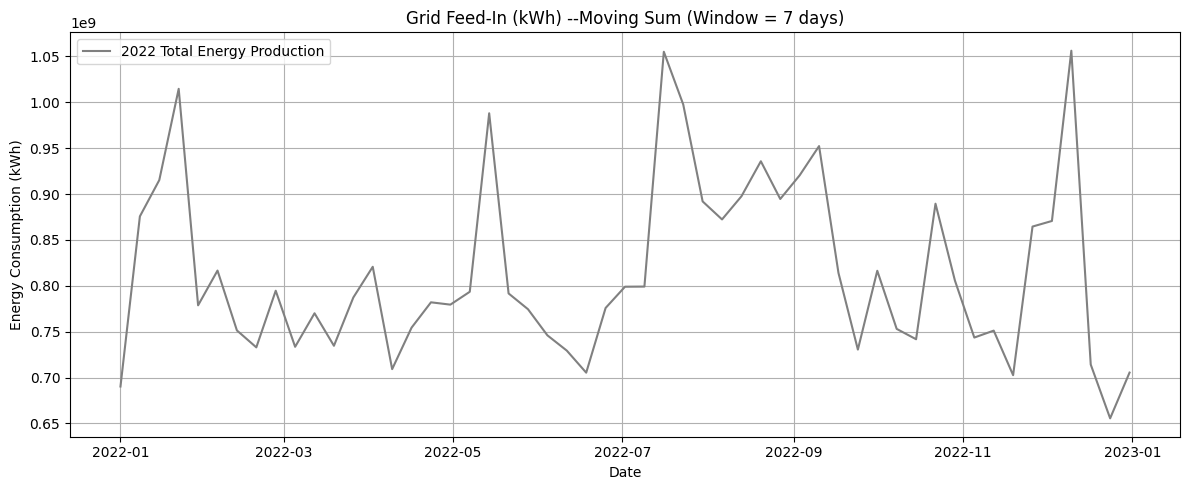

In [14]:
year = 2022
month = 5
df_summed = df.resample('7D').sum()
df_month = df_summed[(df_summed.index.year == year)]

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_month['Grid Feed-In (kWh)'], label=f'{year} Total Energy Production', color='gray')
ax.set_title(f'Grid Feed-In (kWh) --Moving Sum (Window = 7 days)')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
year = 2022
month = 5
df_summed = df.resample('7D').sum()
df_month = df_summed[(df_summed.index.year == year)]

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_month['Grid Feed-In (kWh)'], label=f'{year} Total Energy Production', color='gray')
ax.set_title(f'Grid Feed-In (kWh) --Moving Sum (Window = 7 days)')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

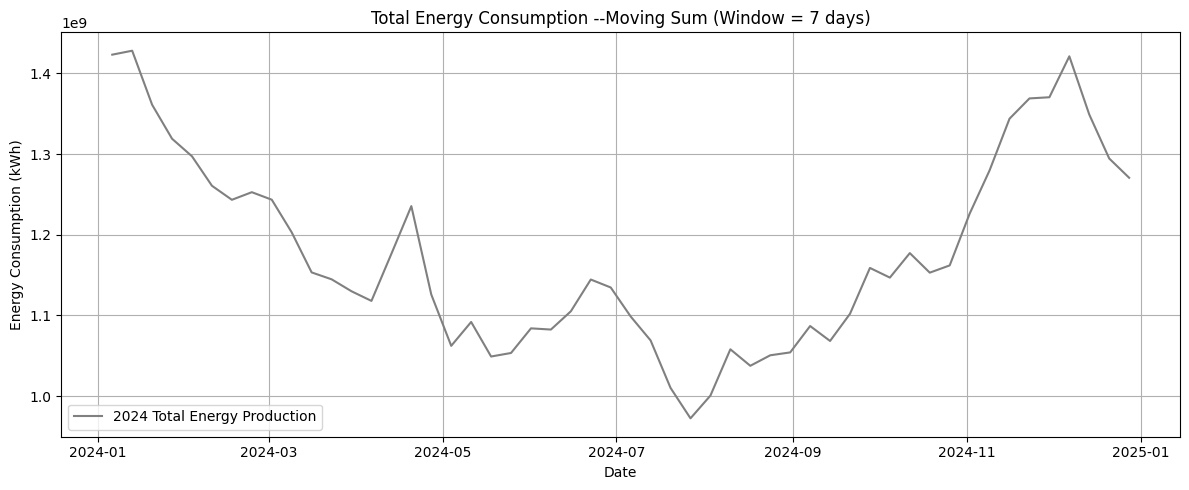

In [15]:
year = 2024
month = 5
df_summed = df.resample('7D').sum()
df_month = df_summed[(df_summed.index.year == year)]

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_month['Total Energy Consumption (kWh)'], label=f'{year} Total Energy Production', color='gray')
ax.set_title(f'Total Energy Consumption --Moving Sum (Window = 7 days)')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

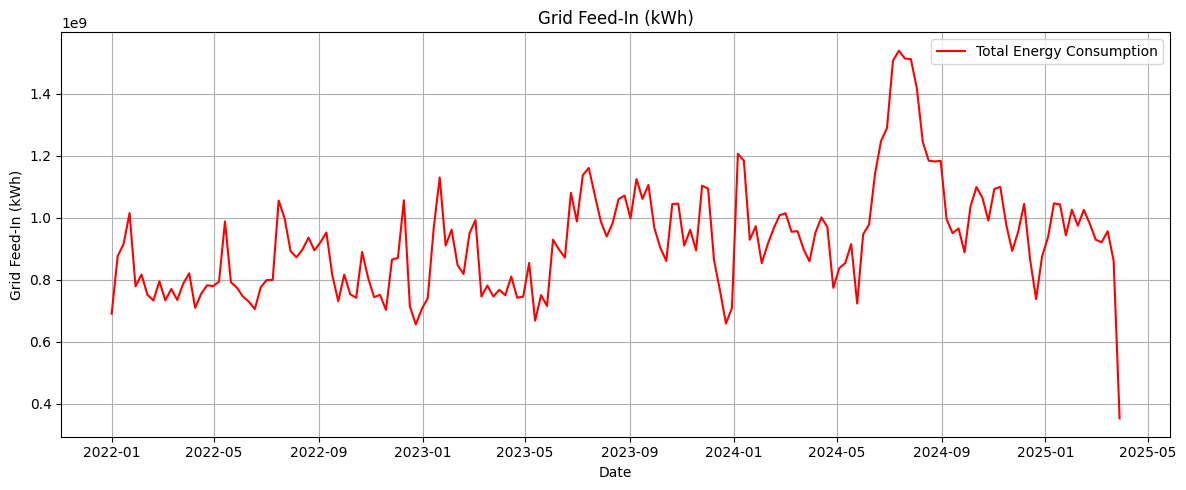

In [26]:
fig, ax = plt.subplots(figsize=(12, 5))
df = df.resample('7D').sum()
ax.plot(df['Grid Feed-In (kWh)'], label='Total Energy Consumption', color='red')
ax.set_title('Grid Feed-In (kWh)')
ax.set_xlabel('Date')
ax.set_ylabel('Grid Feed-In (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

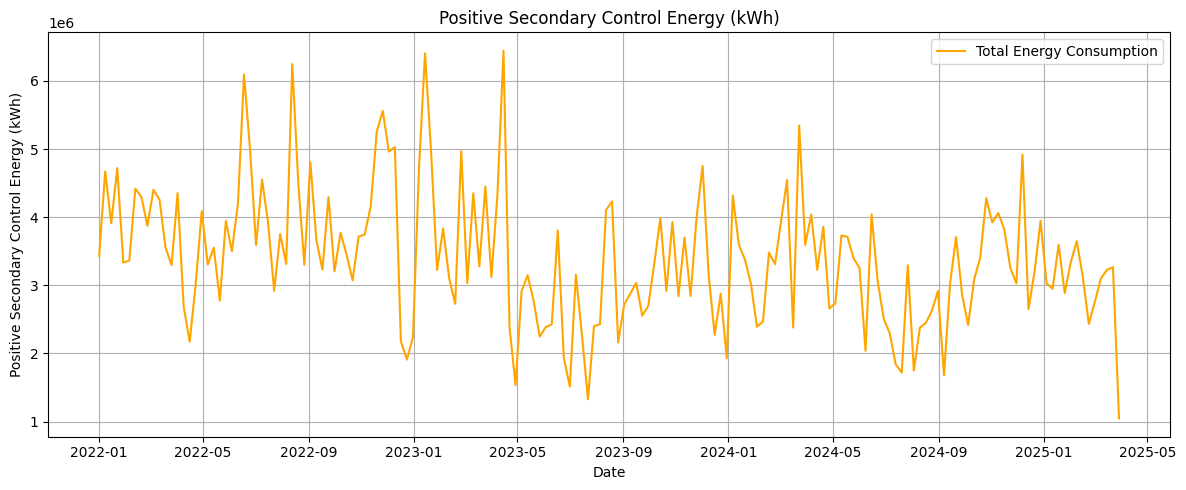

In [27]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df['Positive Secondary Control Energy (kWh)'], label='Total Energy Consumption', color='orange')
ax.set_title('Positive Secondary Control Energy (kWh)')
ax.set_xlabel('Date')
ax.set_ylabel('Positive Secondary Control Energy (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Net Outflow (kWh)

In [17]:
years = [2022, 2023, 2024]

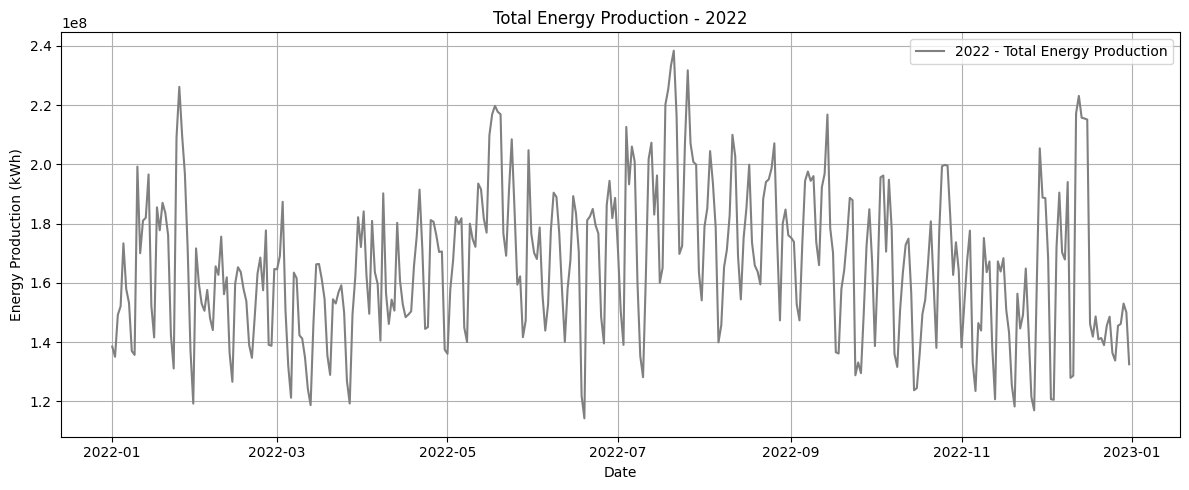

In [18]:
year = 2022
df_year = df[df.index.year == year]
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_year['Total Energy Production (kWh)'], label=f'{year} - Total Energy Production', color='gray')
ax.set_title(f'Total Energy Production - {year}')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Production (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


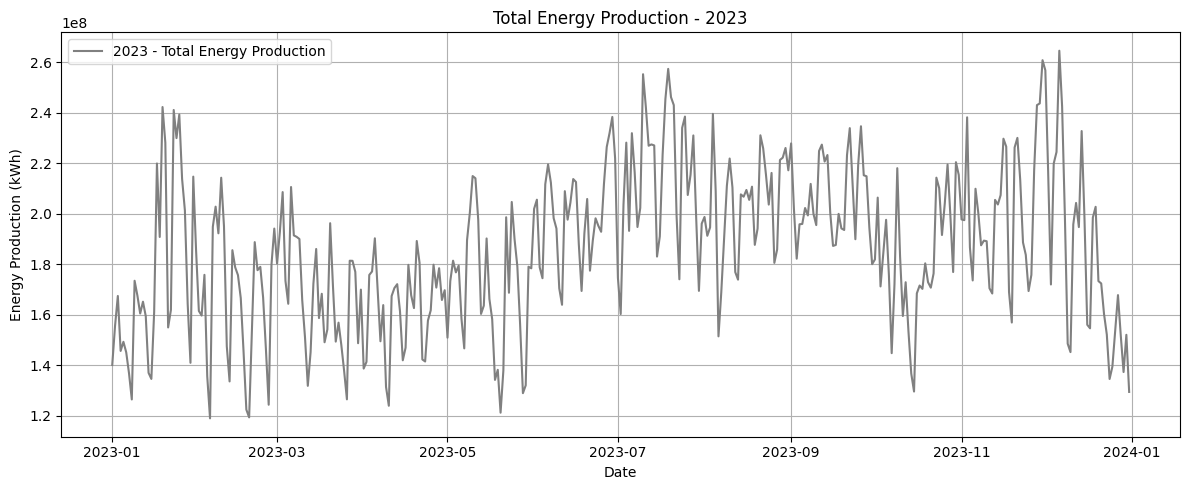

In [19]:
year = 2023
df_year = df[df.index.year == year]
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_year['Total Energy Production (kWh)'], label=f'{year} - Total Energy Production', color='gray')
ax.set_title(f'Total Energy Production - {year}')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Production (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


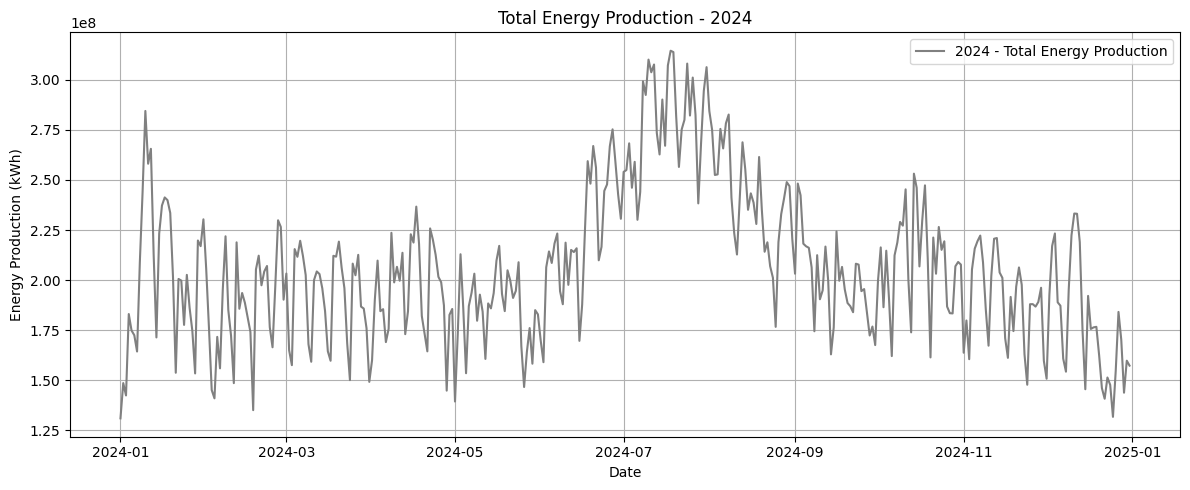

In [20]:
year = 2024
df_year = df[df.index.year == year]
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_year['Total Energy Production (kWh)'], label=f'{year} - Total Energy Production', color='gray')
ax.set_title(f'Total Energy Production - {year}')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Production (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


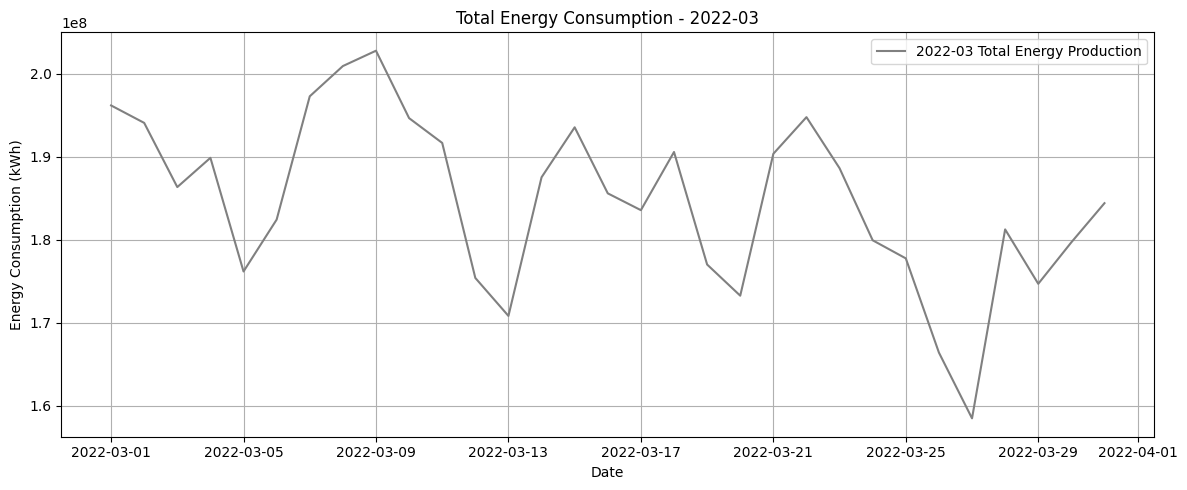

In [21]:
year = 2022
month = 3
df_month = df[(df.index.year == year) & (df.index.month == month)]
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_month['Total Energy Consumption (kWh)'], label=f'{year}-{month:02d} Total Energy Production', color='gray')
ax.set_title(f'Total Energy Consumption - {year}-{month:02d}')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


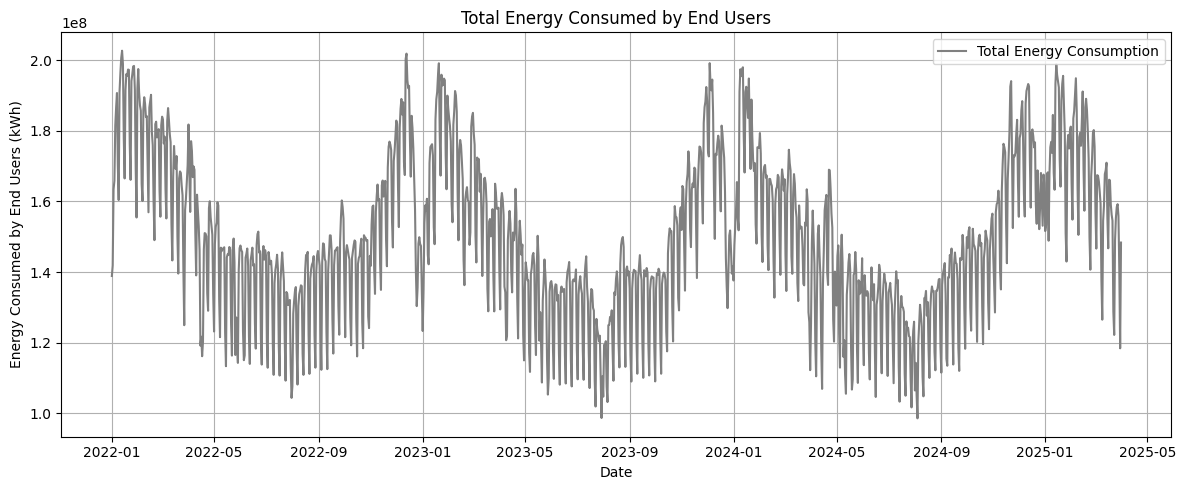

In [22]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df['Total Energy Consumed by End Users (kWh)'], label='Total Energy Consumption', color='gray')
ax.set_title('Total Energy Consumed by End Users')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumed by End Users (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

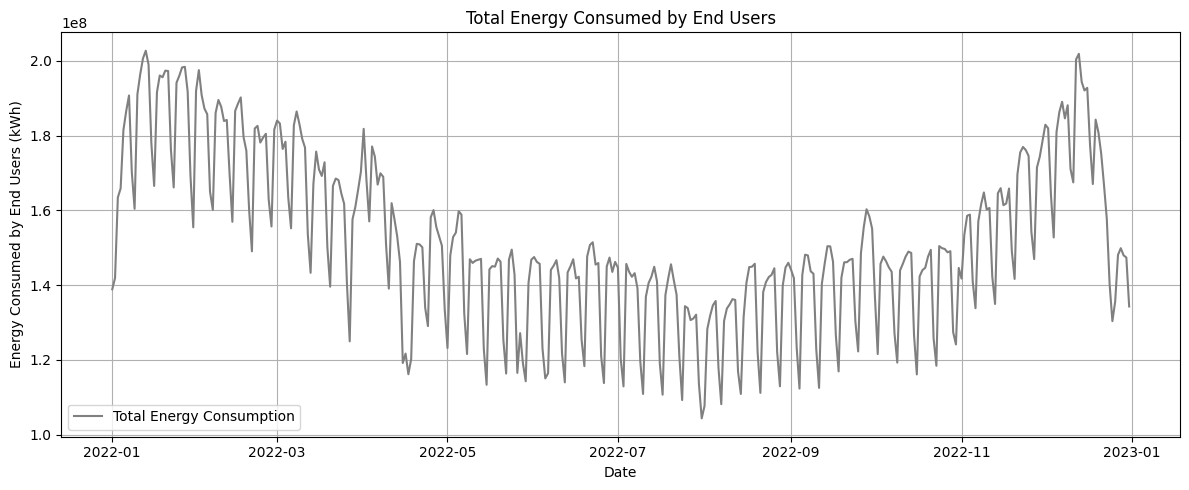

In [23]:

df_year = df[df.index.year == 2022]
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_year['Total Energy Consumed by End Users (kWh)'], label='Total Energy Consumption', color='gray')
ax.set_title('Total Energy Consumed by End Users')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumed by End Users (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()
